<h1 style="color:indigo">*Validación de la clasificación de la cobertura del suelo con Scikit-Learn</h1>
<p>Autor: <a href="https://www.linkedin.com/in/albertoav" style="text-decoration:none;">Alberto Álvarez Vales</a>     
</p>
Fecha: 22/03/2019

In [18]:
import pandas as pd
import numpy as np 
from geopandas import read_file,GeoDataFrame
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [19]:
import psutil
memoriaInicial=psutil.virtual_memory()[4]/1073741824
print("Memoria libre:",round(memoriaInicial,2)," GB")

Memoria libre: 12.41  GB


In [20]:
datosGlobales=read_file("segmented_TopFixed.gpkg")
datosEntrenamiento=read_file("ForClassifySegments.gpkg")

In [21]:
import matplotlib.pyplot as plt

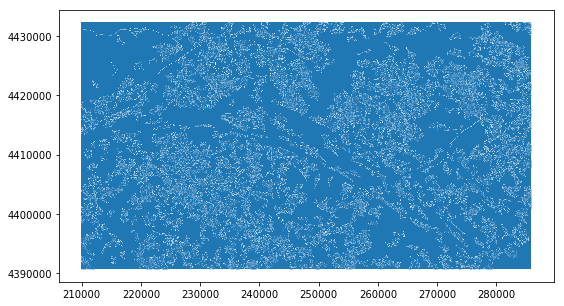

In [22]:
dg=datosGlobales.plot(figsize=(10,5))

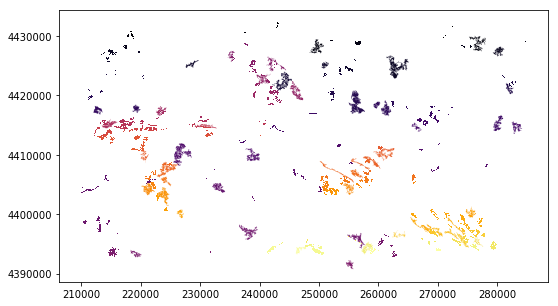

In [23]:
dE=datosEntrenamiento.plot(figsize=(10,5),cmap="inferno",categorical=True)

In [24]:
ax


NameError: name 'ax' is not defined

In [ ]:
df=datosEntrenamiento[["cat","tipo"]].merge(datosGlobales,on="cat",how="left").dropna()

In [ ]:
columnas=['area', 'perimeter',  'fd', 'compact_circle', 
          'B1_sum', 'B1_mean', 'B1_median', 'B1_stdev', 'B1_min', 'B1_max', 
          'B1_variance', 'B2_sum', 'B2_mean', 'B2_median', 'B2_stdev', 'B2_min', 
          'B2_max', 'B2_variance', 'B3_sum', 'B3_mean', 'B3_median', 'B3_stdev', 'B3_min', 'B3_max', 'B3_variance']

In [ ]:
y=np.array(df['tipo'])
X=np.array(df[columnas])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
cls=RandomForestClassifier(n_estimators=30).fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import cross_val_predict
from sklearn import metrics

In [ ]:
scores=cross_val_score(cls,X,y,cv=10)

In [ ]:
print("Precisión: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

In [ ]:
#otra posibilidad

from sklearn.model_selection import ShuffleSplit

n_samples=X.shape[0]

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

scores=cross_val_score(RandomForestClassifier(n_estimators=30),X,y,cv=cv)


In [ ]:
print("Precisión: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [ ]:
scoring=['precision_macro','recall_macro']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#programa en python
import pandas as pd
import numpy as np 
from geopandas import read_file,GeoDataFrame
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

datosGlobales=read_file("../predicciónV2/segmented_TopFixed.gpkg")
datosEntrenamiento=read_file("../predicciónV2/ForClassifySegments.gpkg")
df=datosEntrenamiento[["cat","tipo"]].merge(datosGlobales,on="cat",how="left").dropna()

columnas=['area', 'perimeter',  'fd', 'compact_circle', 'B1_sum', 'B1_mean', 'B1_median', 'B1_stdev', 'B1_min', 'B1_max', 'B1_variance', 'B2_sum', 'B2_mean', 'B2_median', 'B2_stdev', 'B2_min', 'B2_max', 'B2_variance', 'B3_sum', 'B3_mean', 'B3_median', 'B3_stdev', 'B3_min', 'B3_max', 'B3_variance']

y=np.array(df['tipo'])
X=np.array(df[columnas])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

clasificador=RandomForestClassifier(n_estimators=30)

from sklearn.model_selection import ShuffleSplit,cross_val_score

n_samples=X.shape[0]

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

evaluacion=cross_val_score(clasificador,X,y,cv=cv)

print("EN %d PREDICCIONES\nACIERTO media:  %0.2f, desviación típica: %0.2f" % (cv.n_splits,evaluacion.mean(),valor.std()*2))


In [ ]:
plt.boxplot(valor)

In [ ]:
plt.hist(valor,bins=3)

In [ ]:
#se libera la RAM
del datosGlobales,datosEntrenamiento,df,columnas

In [ ]:
import psutil
memoriaFinal=psutil.virtual_memory()[4]/1073741824
print("Memoria libre:",round(memoriaFinal,2)," GB")
print("Memoria usada:", round(memoriaInicial-memoriaFinal,3)," GB")

<a href="mailto:alberto@torredebabel.com" style="text-decoration:none;" title="Alberto Álvarez Vales">
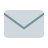</a>
<a href="https://www.linkedin.com/in/albertoav" style="text-decoration:none;" title="Alberto Álvarez Vales">
</a> 